Reading test_csvwriter_0_intensity_map_non_normalized.csv


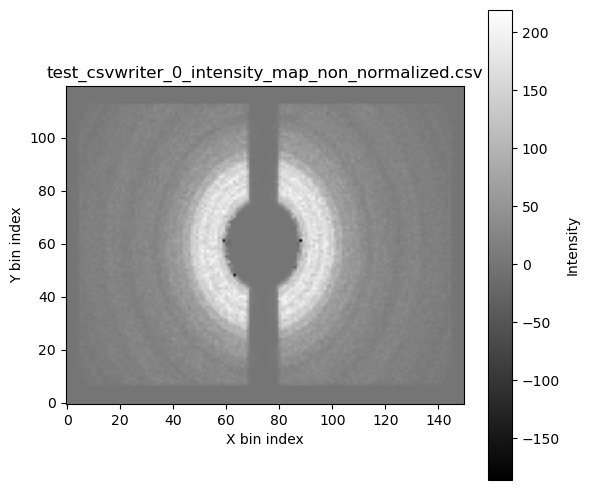

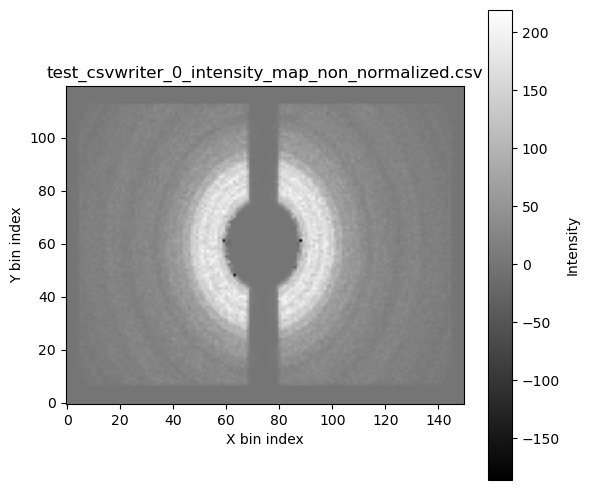

Saved image to test_csvwriter_0_intensity_map_non_normalized_quick.png
matrix shape (rows=Y, cols=X): (120, 150)
min/max: -186.0 219.0


In [3]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Simple quick reader for txtToHist.C output (matrix or x,y,intensity list)
cand = glob.glob("*intensity*.csv") or glob.glob("*intensity*.csv") or glob.glob("*.csv")
if not cand:
    raise SystemExit('No CSV found in current dir')
fname = cand[0]
print('Reading', fname)

# Drop the first (non-numeric) line, then read the numeric CSV
df = pd.read_csv(fname, header=None, comment='#', skiprows=1)

if df.shape[1] == 3:
    # point list: x_pixel, y_pixel, intensity
    x = df.iloc[:,0].values
    y = df.iloc[:,1].values
    v = df.iloc[:,2].values
    ux = np.unique(x); uy = np.unique(y)
    ux.sort(); uy.sort()
    nx = ux.size; ny = uy.size
    mat = np.full((ny, nx), np.nan)
    xi = np.searchsorted(ux, x)
    yi = np.searchsorted(uy, y)
    for X, Y, VV in zip(xi, yi, v):
        mat[Y, X] = VV
else:
    # assume matrix: rows = Y, cols = X
    mat = df.values.astype(float)

plt.figure(figsize=(6,5))
plt.imshow(mat, origin='lower', cmap='gray')
plt.colorbar(label='Intensity')
plt.title(fname)
plt.xlabel('X bin index')
plt.ylabel('Y bin index')
plt.tight_layout()
out = fname.replace('.csv','') + '_quick.png'
plt.show()
plt.savefig(out, dpi=150)
print('Saved image to', out)
print('matrix shape (rows=Y, cols=X):', mat.shape)
print('min/max:', np.nanmin(mat), np.nanmax(mat))